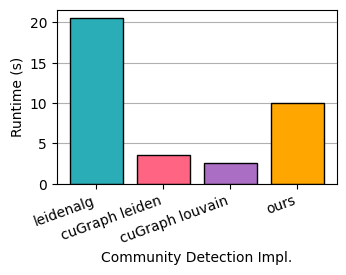

In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from pathlib import Path

curr_path = Path()

with open(curr_path / "../results/yt_perf.json", "r") as f:
    runtime_results = json.load(f)

df = pd.DataFrame(runtime_results)

f, ax = plt.subplots(1, figsize=(4, 3))

labels = df["label"]
values = df["runtime"]

col = [
    "#2aadb6",
    "#ff6583",
    "#aa6fc5",
    "#ffa600",
]

colors = []

for idx, row in df.iterrows():
    # model_idx = row['model_idx']
    # colors.append(col[model_idx])
    colors.append(col[idx])

# plt.title("cuGraph Leiden varied max_iter")
plt.xlabel("Community Detection Impl.")
plt.ylabel('Runtime (s)')

plt.bar(labels, values, color=colors, linewidth=1, edgecolor='black')
# plt.plot(max_iter, values)

plt.xticks(rotation=20, ha='right')
plt.grid(axis='y')
plt.gca().set_axisbelow(True)

plt.subplots_adjust(left=0.2, bottom=0.3)

figs_dir = Path.resolve(curr_path / "../figs")

os.makedirs(figs_dir, exist_ok=True)

plt.savefig(figs_dir / f"yt_perf.pdf")